In [20]:
# pip install
#!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from pprint import pprint
import time

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")

Imported all.


# Open data files

In [102]:
# original, NC, FTFP
physic_model = "NC"

# Open propmt TPC data file
file_dir = f"./assets/{physic_model}/A_Z_count-TPC_prompt.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_prompt = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_prompt)
# Reorder columns
df_TPC_prompt = df_TPC_prompt[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

Considered delayed if created at time > 20 microseconds

In [103]:
# Open delayed TPC data file
file_dir = f"./assets/{physic_model}/A_Z_count-TPC_delayed.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_TPC_delayed = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_TPC_delayed)
# Reorder columns
df_TPC_delayed = df_TPC_delayed[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

In [104]:
# Open buffer data file
file_dir = f"./assets/{physic_model}/A_Z_count-buffers.txt"
columns = ["Mass Number", "Atomic Number", "Counts"]
df_buffers = open_data(file_dir, columns)
# Add in isotope data
add_isotope_data(df_buffers)
# Reorder columns
df_buffers = df_buffers[["Iso Symbol","Atomic Number","Mass Number","Counts","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Preprocessing

### Add Production (/yr)

In [105]:
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
day_in_nano = (8.64 * 10 ** 13)
sim_length = 29.01
df_buffers["Production (/yr)"] = df_buffers["Counts"] / sim_length
df_TPC_prompt["Production (/yr)"] = df_TPC_prompt["Counts"] / sim_length
df_TPC_delayed["Production (/yr)"] = df_TPC_delayed["Counts"] / sim_length

### Add number of decays of isotopes per year

In [106]:
df_TPC_delayed["Decays (/yr)"] = df_TPC_delayed["Production (/yr)"] - df_TPC_delayed["Production (/yr)"] * np.e ** (-np.log(2)/(df_TPC_delayed["Half Life (ns)"] * 10 ** -9) * year_in_sec)
df_TPC_prompt["Decays (/yr)"] = df_TPC_prompt["Production (/yr)"] - df_TPC_prompt["Production (/yr)"] * np.e ** (-np.log(2)/(df_TPC_prompt["Half Life (ns)"] * 10 ** -9) * year_in_sec)
df_buffers["Decays (/yr)"] = df_buffers["Production (/yr)"] - df_buffers["Production (/yr)"] * np.e ** (-np.log(2)/(df_buffers["Half Life (ns)"] * 10 ** -9) * year_in_sec)

### Create unstable dfs

In [107]:
unstable_buffers = df_buffers[df_buffers["Stable"] == False]
unstable_TPC_prompt = df_TPC_prompt[df_TPC_prompt["Stable"] == False]
unstable_TPC_delayed = df_TPC_delayed[df_TPC_delayed["Stable"] == False]

### Print Information

In [108]:
print("Buffers:")
print(f"No: {len(df_buffers)}")
print(f"Total Counts: {df_buffers['Counts'].sum()}")
print(f"Total Production (yr): {df_buffers['Production (/yr)'].sum()}")
print(f"Number of stable isotopes: {len(df_buffers) - len(unstable_buffers)}")
print(f"Number of unstable isotopes: {len(unstable_buffers)}")
print()
print("TPC Prompt:")
print(f"No: {len(df_TPC_prompt)}")
print(f"Total Counts: {df_TPC_prompt['Counts'].sum()}")
print(f"Total Production (yr): {df_TPC_prompt['Production (/yr)'].sum()}")
print(f"Number of stable isotopes: {len(df_TPC_prompt) - len(unstable_TPC_prompt)}")
print(f"Number of unstable isotopes: {len(unstable_TPC_prompt)}")
print()
print("TPC Delayed:")
print(f"No: {len(df_TPC_delayed)}")
print(f"Total Counts: {df_TPC_delayed['Counts'].sum()}")
print(f"Total Production (yr): {df_TPC_delayed['Production (/yr)'].sum()}")
print(f"Number of stable isotopes: {len(df_TPC_delayed) - len(unstable_TPC_delayed)}")
print(f"Number of unstable isotopes: {len(unstable_TPC_delayed)}")

Buffers:
No: 181
Total Counts: 191335006
Total Production (yr): 6595484.522578421
Number of stable isotopes: 39
Number of unstable isotopes: 142

TPC Prompt:
No: 170
Total Counts: 79525683
Total Production (yr): 2741319.6483971043
Number of stable isotopes: 39
Number of unstable isotopes: 131

TPC Delayed:
No: 93
Total Counts: 18009353
Total Production (yr): 620798.1041020337
Number of stable isotopes: 39
Number of unstable isotopes: 54


### Filter by realistic half-life

Find max and min half lifes

In [28]:
print("Buffers:")
print(f"Min half life (nano): {unstable_buffers['Half Life (ns)'].min()}\nMax half life (day): {unstable_buffers['Half Life (ns)'].max() / day_in_nano}")
print("TPC Prompt:")
print(f"Min half life (nano): {unstable_TPC_prompt['Half Life (ns)'].min()}\nMax half life (day): {unstable_TPC_prompt['Half Life (ns)'].max() / day_in_nano}")
print("TPC Delayed:")
print(f"Min half life (nano): {unstable_TPC_delayed['Half Life (ns)'].min()}\nMax half life (day): {unstable_TPC_delayed['Half Life (ns)'].max() / day_in_nano}")

Buffers:
Min half life (nano): 0.0
Max half life (day): 1096064814814814.9
TPC Prompt:
Min half life (nano): 0.0
Max half life (day): 1096064814814814.9
TPC Delayed:
Min half life (nano): 7.91e-22
Max half life (day): 1096064814814814.9


In [29]:
# year * days * nanoseconds
upper_lim = 1 * 356 * day_in_nano
buffer_before = len(unstable_buffers)
TPC_p_before = len(unstable_TPC_prompt)
TPC_d_before = len(unstable_TPC_delayed)
unstable_buffers = unstable_buffers[unstable_buffers["Half Life (ns)"] < upper_lim].sort_values("Half Life (ns)")
unstable_TPC_prompt = unstable_TPC_prompt[unstable_TPC_prompt["Half Life (ns)"] < upper_lim].sort_values("Half Life (ns)")
unstable_TPC_delayed = unstable_TPC_delayed[unstable_TPC_delayed["Half Life (ns)"] < upper_lim].sort_values("Half Life (ns)")
print(f"Difference:")
print(f"Buffers: {buffer_before - len(unstable_buffers)}")
print(f"TPC Prompt: {TPC_p_before - len(unstable_TPC_prompt)}")
print(f"TPC Delayed: {TPC_d_before - len(unstable_TPC_delayed)}")

Difference:
Buffers: 2
TPC Prompt: 3
TPC Delayed: 1


### Add beta decay energy columns

In [35]:
# https://nds.iaea.org/relnsd/vcharthtml/api_v0_notebook.html
# https://nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html#gamma
# https://nds.iaea.org/relnsd/vcharthtml/VChartHTML.html
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
import time

# the service URL
livechart = "https://nds.iaea.org/relnsd/v0/data?"

import urllib.request

def lc_read_csv(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

def gamma_dec(iso_sym):
    """Calculates average gamma decay - depreciated"""
    sym = iso_sym.split(" ")[0].lower()
    A = iso_sym.split(" ")[1].split("-")[1]
    df = lc_read_csv(livechart + f"fields=decay_rads&nuclides={str(A)+sym}&rad_types=g")
    if not df.empty:
        try:
            average = (df["energy"] * df["intensity"]/100).sum()
            return average
        except:
            pass
    return None

def g_in_range(iso_sym, min_e, max_e, found_e_range, rad_type):
    "Returns True if gamma found in range else False"
    if rad_type == "bm":
        energy_title = "mean_energy"
    else:
        energy_title = "energy"
    sym = iso_sym.split(" ")[0].lower()
    A = iso_sym.split(" ")[1].split("-")[1]
    df = lc_read_csv(livechart + f"fields=decay_rads&nuclides={str(A)+sym}&rad_types={rad_type}")
    ### IMPORTANT ###
    threshhold_intensity = 0.5
    time.sleep(0.02)
    if not df.empty:
        try:
            df = df[df["intensity_beta"] > threshhold_intensity]
            if df[energy_title].max() > found_e_range[1]:
                found_e_range[1] = df[energy_title].max()
            if df[energy_title].min() < found_e_range[0]:
                found_e_range[0] = df[energy_title].min()
            if df[energy_title].between(min_e,max_e).any():
                return True
        except:
            return np.nan
    return False

Get specific data

In [110]:
A = 41
sym = "ar"
# a bp bm g e x (α, β-, β+ and electron capture, γ, Auger and conversion electron, X-ray)
df = lc_read_csv(livechart + f"fields=decay_rads&nuclides={str(A)+sym}&rad_types=bm")
# df

Add decay columns

In [37]:
min_b_e = 0
max_b_e = 100
found_e_range = [np.inf,0]
rad_type = "bm"
beta_col_name = f"BDecay {min_b_e}-{max_b_e} (keV)"
unstable_TPC_delayed[beta_col_name] = unstable_TPC_delayed.apply(lambda x : g_in_range(x["Iso Symbol"], min_b_e, max_b_e, found_e_range, rad_type), axis = 1)
unstable_TPC_prompt[beta_col_name] = unstable_TPC_prompt.apply(lambda x : g_in_range(x["Iso Symbol"], min_b_e, max_b_e, found_e_range, rad_type), axis = 1)
unstable_buffers[beta_col_name] = unstable_buffers.apply(lambda x : g_in_range(x["Iso Symbol"], min_b_e, max_b_e, found_e_range, rad_type), axis = 1)
print(f"Decay beta energy range (min/max) {found_e_range[0]}-{found_e_range[1]} keV")

Decay beta energy range (min/max) 48.758-10048 keV


# Total ratios of prompt to delayed counts

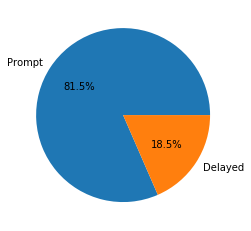

In [111]:
plt.pie(x=[df_TPC_prompt["Counts"].sum(), df_TPC_delayed["Counts"].sum()], autopct='%1.1f%%', labels=["Prompt", "Delayed"])
plt.savefig('./img/prompt-delayed.png')
plt.show()

# Total ratio of counts in TPC to buffer 

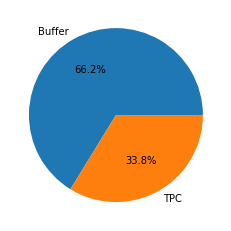

In [39]:
plt.pie(x=[df_buffers["Counts"].sum(), df_TPC_delayed["Counts"].sum() + df_TPC_prompt["Counts"].sum()], autopct='%1.1f%%', labels=["Buffer", "TPC"])
plt.show()

# Look for important unstable in buffer
Can't really do this - need another geant4 simulation

# Look for important unstable prompt isotopes in TPC
Isotopes that are produced inside the deadtime, but will live long enough to decay outside this time and emit a detectable signal

In [40]:
# Filter with halflife greater than deadtime (lasts long enough)
important_TPC_prompt = unstable_TPC_prompt[unstable_TPC_prompt["Half Life (ns)"] > 20000000].sort_values("Production (/yr)", ascending=False).reset_index(drop=True)
# Filter with beta energy ranges
important_TPC_prompt = important_TPC_prompt[pd.isnull(important_TPC_prompt[beta_col_name]) | (important_TPC_prompt[beta_col_name] == True)]

print(f"Number of isotopes in range: {len(important_TPC_prompt)}")
print(f"Total Production (/yr): {important_TPC_prompt['Production (/yr)'].sum()}")
important_TPC_prompt

Number of isotopes in range: 2
Total Production (/yr): 181.6614960358497


,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Decays (/yr),BDecay 0-100 (keV)
2,Si 14-32,14,32,4824,0.000061,False,4.830000e+09,"[[B-, 1.0, 0.224]]",0.224,red,166.287,166.287,True
5,C 6-14,6,14,446,0.000006,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,15.374,15.374,True


# Look for important unstable delayed isotopes in TPC

## Any isotopes that beta decay

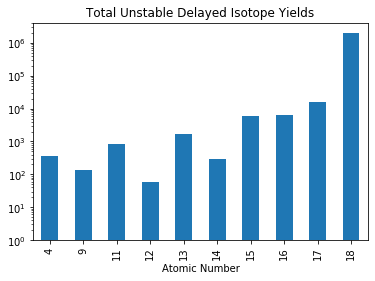

   Iso Symbol Atomic Number Mass Number   Counts  Production Yield  Stable  \
87   Ar 18-41            18          41  1793830          0.099605   False   
82   Ar 18-39            18          39   168935          0.009380   False   
75   Ar 18-37            18          37    48543          0.002695   False   

    Half Life (ns) Decay Modes (m, b, q MeV)  Max Q-Value Plot Colour  \
87    6.580000e+03        [[B-, 1.0, 2.492]]        2.492         red   
82    8.490000e+09        [[B-, 1.0, 0.565]]        0.565         red   
75    3.030000e+06        [[EC, 1.0, 0.814]]        0.814         red   

   Production (/yr) Decays (/yr) BDecay 0-100 (keV)  
87          61834.9      61834.9              False  
82          5823.34      5823.34              False  
75          1673.32      1673.32              False  


,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Decays (/yr),BDecay 0-100 (keV)
87,Ar 18-41,18,41,1793830,0.099605,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,61834.9,61834.9,False
82,Ar 18-39,18,39,168935,0.009380,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,5823.34,5823.34,False
75,Ar 18-37,18,37,48543,0.002695,False,3.030000e+06,"[[EC, 1.0, 0.814]]",0.814,red,1673.32,1673.32,False
77,Cl 17-38,17,38,15151,0.000841,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,522.268,522.268,False
66,S 16-35,16,35,5185,0.000288,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,178.731,178.731,True
55,P 15-32,15,32,4849,0.000269,False,1.230000e+06,"[[B-, 1.0, 1.71]]",1.710,red,167.149,167.149,False
43,Al 13-28,13,28,1534,0.000085,False,1.340000e+02,"[[B-, 1.0, 4.642]]",4.642,red,52.8783,52.8783,False
73,S 16-37,16,37,963,0.000053,False,3.030000e+02,"[[B-, 1.0, 4.865]]",4.865,red,33.1954,33.1954,False
33,Na 11-24,11,24,773,0.000043,False,5.400000e+04,"[[B-, 1.0, 5.515]]",5.515,red,26.646,26.646,False
61,P 15-34,15,34,617,0.000034,False,1.240000e+01,"[[B-, 1.0, 5.374]]",5.374,red,21.2685,21.2685,False


In [56]:
# All unstable that beta decay with decays per year > 1
unstable_TPC_delayed_beta = unstable_TPC_delayed[unstable_TPC_delayed["Decays (/yr)"] > 1].sort_values("Counts", ascending=False)
unstable_TPC_delayed_beta_high = unstable_TPC_delayed_beta[unstable_TPC_delayed_beta["Production Yield"]> 0.001]
unstable_TPC_delayed_grouped = unstable_TPC_delayed_beta.groupby(['Atomic Number'])["Counts"].sum()
unstable_TPC_delayed_grouped.plot.bar(x="Atomic Number", log=True)
plt.title("Total Unstable Delayed Isotope Yields")
plt.show()
print(unstable_TPC_delayed_beta_high)
unstable_TPC_delayed_beta

## Filter with high probability for beta emission in range

In [42]:
# Filter with beta energy ranges
important_TPC_delayed = unstable_TPC_delayed[pd.isnull(unstable_TPC_delayed[beta_col_name]) | (unstable_TPC_delayed[beta_col_name] == True)].sort_values("Counts", ascending=False).reset_index(drop=True)

print(f"Number of isotopes in range: {len(important_TPC_delayed)}")
print(f"Total Production (yr): {important_TPC_delayed['Production (/yr)'].sum()}\n")

print(f"Beta decays: {len(important_TPC_delayed[important_TPC_delayed[beta_col_name] == True])}")
print(f"Beta decay productions (/yr): {important_TPC_delayed.loc[important_TPC_delayed[beta_col_name] == True, 'Decays (/yr)'].sum()}\n")

Number of isotopes in range: 7
Total Production (yr): 206.7218200620476

Beta decays: 6
Beta decay productions (/yr): 206.51499482936921



In [43]:
file_dir = f"./assets/{physic_model}/important_iso.csv"
important_TPC_delayed.to_csv(file_dir)
important_TPC_delayed

,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Decays (/yr),BDecay 0-100 (keV)
0,S 16-35,16,35,5185,2.879060e-04,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,178.731,178.731,True
1,P 15-33,15,33,606,3.364918e-05,False,2.190000e+06,"[[B-, 1.0, 0.249]]",0.249,red,20.8893,20.8893,True
2,S 16-38,16,38,157,8.717692e-06,False,1.020000e+04,"[[B-, 1.0, 2.937]]",2.937,red,5.41193,5.41193,True
3,Si 14-32,14,32,36,1.998961e-06,False,4.830000e+09,"[[B-, 1.0, 0.224]]",0.224,red,1.24095,1.24095,True
4,Si 14-34,14,34,6,3.331602e-07,False,2.770000e+00,"[[B-, 1.0, 4.601]]",4.601,red,0.206825,0.206825,NaN
5,C 6-14,6,14,6,3.331602e-07,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,0.206825,0.206825,True
6,Mg 12-28,12,28,1,5.552670e-08,False,7.530000e+04,"[[B-, 1.0, 1.832]]",1.832,red,0.0344709,0.0344709,True


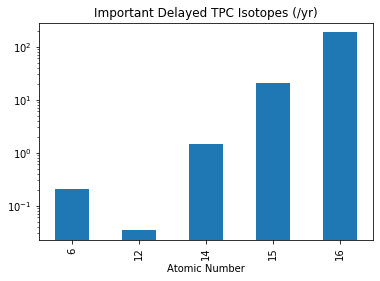

In [44]:
important_TPC_delayed_groups = important_TPC_delayed.groupby(['Atomic Number'])["Decays (/yr)"].sum()
important_TPC_delayed_groups.plot.bar(x="Atomic Number", log=True)
plt.title("Important Delayed TPC Isotopes (/yr)")
plt.show()

# Combine df and convert to latex

In [58]:
print("Table Splitting (inclusive)")
important_combined = pd.concat([important_TPC_prompt.sort_values("Atomic Number"), important_TPC_delayed.sort_values("Atomic Number")]).reset_index(drop=True)
print(f"Total: {len(important_combined)}")
print(f"TPC Prompt: 0-{len(important_TPC_prompt)-1}")
print(f"TPC Delayed: {len(important_TPC_prompt)-1}-{len(important_TPC_prompt) + len(important_TPC_delayed)-1}")
important_combined

Table Splitting (inclusive)
Total: 9
TPC Prompt: 0-1
TPC Delayed: 1-8


,Iso Symbol,Atomic Number,Mass Number,Counts,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr),Decays (/yr),BDecay 0-100 (keV)
0,C 6-14,6,14,446,5.608251e-06,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,15.374,15.374,True
1,Si 14-32,14,32,4824,6.065965e-05,False,4.830000e+09,"[[B-, 1.0, 0.224]]",0.224,red,166.287,166.287,True
2,C 6-14,6,14,6,3.331602e-07,False,1.800000e+11,"[[B-, 1.0, 0.156]]",0.156,red,0.206825,0.206825,True
3,Mg 12-28,12,28,1,5.552670e-08,False,7.530000e+04,"[[B-, 1.0, 1.832]]",1.832,red,0.0344709,0.0344709,True
4,Si 14-32,14,32,36,1.998961e-06,False,4.830000e+09,"[[B-, 1.0, 0.224]]",0.224,red,1.24095,1.24095,True
5,Si 14-34,14,34,6,3.331602e-07,False,2.770000e+00,"[[B-, 1.0, 4.601]]",4.601,red,0.206825,0.206825,NaN
6,P 15-33,15,33,606,3.364918e-05,False,2.190000e+06,"[[B-, 1.0, 0.249]]",0.249,red,20.8893,20.8893,True
7,S 16-35,16,35,5185,2.879060e-04,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,178.731,178.731,True
8,S 16-38,16,38,157,8.717692e-06,False,1.020000e+04,"[[B-, 1.0, 2.937]]",2.937,red,5.41193,5.41193,True


In [59]:
# Add columns
important_combined["Half Life (s)"] = important_combined["Half Life (ns)"] * 10 ** -9

In [47]:
important_combined = important_combined[["Iso Symbol", "Production (/yr)", "Half Life (s)", "Decay Modes (m, b, q MeV)"]]
print("\n", important_combined.to_latex())


 \begin{tabular}{lllrl}
\toprule
{} & Iso Symbol & Production (/yr) &  Half Life (s) & Decay Modes (m, b, q MeV) \\
\midrule
0 &     C 6-14 &           15.374 &   1.800000e+02 &        [[B-, 1.0, 0.156]] \\
1 &   Si 14-32 &          166.287 &   4.830000e+00 &        [[B-, 1.0, 0.224]] \\
2 &     C 6-14 &         0.206825 &   1.800000e+02 &        [[B-, 1.0, 0.156]] \\
3 &   Mg 12-28 &        0.0344709 &   7.530000e-05 &        [[B-, 1.0, 1.832]] \\
4 &   Si 14-32 &          1.24095 &   4.830000e+00 &        [[B-, 1.0, 0.224]] \\
5 &   Si 14-34 &         0.206825 &   2.770000e-09 &        [[B-, 1.0, 4.601]] \\
6 &    P 15-33 &          20.8893 &   2.190000e-03 &        [[B-, 1.0, 0.249]] \\
7 &    S 16-35 &          178.731 &   7.550000e-03 &        [[B-, 1.0, 0.167]] \\
8 &    S 16-38 &          5.41193 &   1.020000e-05 &        [[B-, 1.0, 2.937]] \\
\bottomrule
\end{tabular}

